# Vertical levels in the UM

The UM uses a hybrid-height vertical coordinate. Vertical levels transition from being 'terrain-following' near the surface to levels of constant height at higher altitudes. The point at which the levels become constant height levels is defined by the 'first constant $\rho$-level'.

### Eta ($\eta$) - The terrain-folowing coordinate
$\eta$ is the terrain-following dimensionless vertical coordinate. 
* $\eta=0$ corresponds to the surface; $r=r_s(\lambda, \phi)$
* $\eta=1$ corresponds to the rigid model top that is defined at a constant height; $r=r_T$

$r_s(\lambda, \phi)$ is the height of orography (above the datum) at a particular point (i.e. a function of latitude and longitude, generally) and $r_T$ is the height of the model top (a constant).

### Atmosphere hybrid-height coordinate ($z$) in the UM
The atmosphere hybrid-height coordinate for a gridpoint $(k,j,i)$ is defined (CF Conventions) as 

$z(n, k, j, i) = a(k) + b(k)*r_s(n,j,i)$

In general $z$ is a function of time ($n$) but dependence on time is neglected here. $r_s(j,i)$ is the height of orography written as a function of grid cell indices $j$ and $i$, rather than latitude and longitude. The hybrid-height $z(k,j,i)$ is the height of a level (point) above the datum (e.g. the geoid, which is approximately mean sea-level). $a(k)$ and $b(k)$ are coordinates that define the hybrid-height level $k$. 

For the UM specific definitions of $a(k)$ and $b(k)$ are made: 

$a(k)$ has the units of length and is defined $a(k) = \eta(k)*r_T$. From this we can see that $a(k)$ is a 'level height' that scales linearly with $\eta$ and defined by the limits $a=0$ for $\eta=0$ and $a=r_T$ for $\eta=1$. It is the height a level would have in the absence of orography.

$b(k)$ is a dimensionless quantity and is defined: 
* $b(k) = [1 - \frac{\eta(k)}{\eta_{cst}}]^2$, where $\eta_{cst}$ is the value of $\eta$ at the first constant $\rho$-level, for vertical levels below or at the first constant $\rho$-level. 
* $b(k)$ = 0 for vertical levels above the first constant $\rho$-level 

At the surface, $\eta=0$ and $b(k) = 1$, and so the hybrid-height is simply the height of the orography, $z(0,j,i) = r_s(j, i)$, since $a(0)=0$. Above the surace ($\eta>1$ and $b<1$) the relative contribution of orography becomes smaller. Above the first constant $\rho$-level the contribution from orography is completely neglected ($b(k)=0$) and we have simply $z(k,j,i) = a(k)$ (i.e. hybrid-height levels are equal to the level height and independent of horizontal location).

### Height above surface
The height of a level above the surface (i.e. above the ground when over land) can be calculated by subtracting the height of the orography from the hybrid-height:

$z_{surface}(k,j,i) = z(k,j,i) - r_s(j,i)$ 

$z_{surface}(k,j,i) = a(k) - r_s(j,i)[1-b(k)]$

At the surface ($\eta=0, b=1$) we have simply $z_{surface}= a = 0$. Above, but very close to, the surface we have $z_{surface}(k) \approx a(k)$ since $b(k)$ is close to, but slightly less than, unity. Further from the surface, as $b(k)$ becomes smaller, the difference between $z_{surface}(k)$ and $a(k)$ becomes larger. Above the first constant $\rho$-level $z_{surface}(k,j,i)$ is exactly $r_s(j,i)$ less than $a(k)$. 

The difference between the level height ($a(k)$) and the height above the surface ($z_{surface}(k)$) becomes larger with increasing height, in the presence of orography. The difference reaches a maximum value at the first constant $rho$-level and is constant above that. When there is no orography (e.g. over the sea) then $z_{surface}$ is equal to $a(k)$.

### Height coordinates in Iris cubes for UM data
The above coordinates are usually included as auxillary coordinates for UM Iris cubes.
* `level_height`: corresponds to $a(k)$
* `sigma`: corresponds to $b(k)$
* (optional) `altitude`: corresponds to the hybrid-height $z(k, j, i)$

Since altitude (hybrid-height) depends on orography it is only present if the orography (section 0, item 33) is available in the input files that are read by `iris.load`

Iris cubes will use an integer `model_level_number` coordinate as the dimcoord for the z-axis. The height-based vertical coords above will be present as auxillary coordinates. 



## A visualisation of UM vertical levels

In [1]:
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

# Path to a sample UM pp file 
filepath = "/scratch/bdrummon/mass_retrievals/prodm_op_aqum_20180430_18.000.pp"
latindex = 115

Load some UM data including an example variable and orography

In [2]:
cubes = iris.load(filepath)
var = cubes.extract("mass_fraction_of_ozone_in_air", strict=True)
orog = cubes.extract("surface_altitude", strict=True)

### Plot the orography for this domain
The red line indicates the latitude cross-section that is used for height plots below

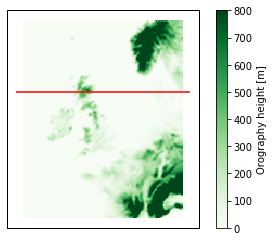

In [4]:
iplt.pcolormesh(orog, vmin=0., vmax=800, cmap='Greens')
cb = plt.colorbar(label='Orography height [m]')

# Add a line to mark latitude cross section
ax = plt.gca()
xmin, xmax = ax.get_xlim()
y = orog[latindex].coord('grid_latitude').points
plt.hlines(y=y, xmin=xmin, xmax=xmax, color='red')

## Plot cross sections of height coordinates
The different height coordinates are illustrated below, using a particular latitude cross section for the example domain. A series of model levels are plotted separately. The lower panel of each figure shows the orography height for the latitude cross section (which is the same for each case).

#### Near the surface
Near the surface (model level number 1 and 5) the height above the surface is approximately the same as the level height since the model levels are closely terrain-following. Conversely, where orography is present the altitude coordinate deviates significantly from the level height.

#### Above the surface but below the first constant $\rho$-level
For higher model levels (levels 10 and 30), the difference between the level height (a constant) and the height above the surface becomes larger, where orogoraphy is present. Conversely, the difference between the altitude coordinate and the level height becomes less, as the relative contribution of orography becomes smaller.

#### Above the first constant $\rho$-level
Model level number 50 is above the first constant $\rho$-level and the altitude coordinate is uniform across the cross section and identical to the level height, since orography has no contribution to the hybrid-height. Conversely, the difference between the height above the surface and the level height is the equal to the height of the orography at that particular point.



Model level number:  1
  Level height:  20.000004 m
  Sigma:  0.9977232


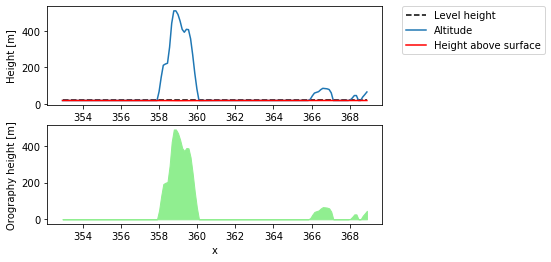

Model level number:  5
  Level height:  233.33604 m
  Sigma:  0.9735986


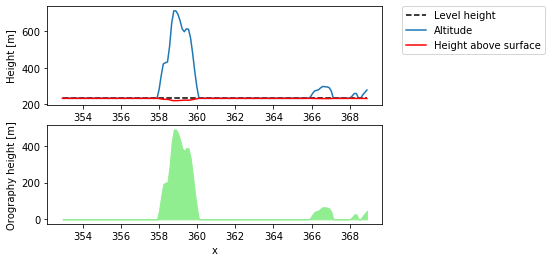

Model level number:  10
  Level height:  800.0001 m
  Sigma:  0.9109523


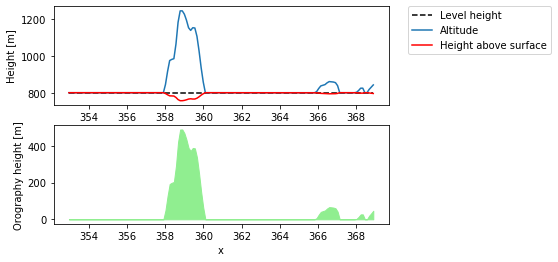

Model level number:  30
  Level height:  6400.001 m
  Sigma:  0.40386757


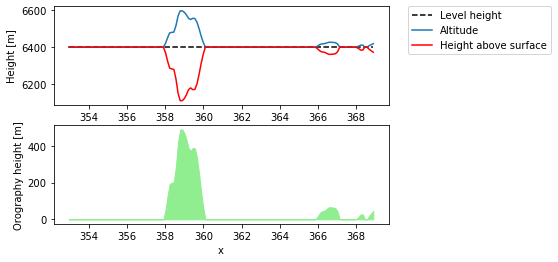

Model level number:  50
  Level height:  17979.732 m
  Sigma:  0.0


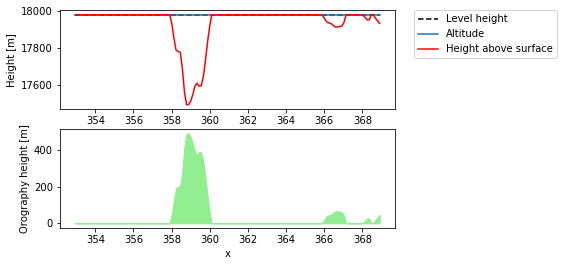

In [5]:
levels = [1, 5, 10, 30, 50]

# Get an x scale
x = orog.coord('grid_longitude').points

for level in levels:
        
    # Extract level from cube
    cube = var.extract(iris.Constraint(model_level_number=level))
    
    print('Model level number: ', level)
    
    # Plot the orography height
    plt.subplot(212)
    plt.fill_between(x, 0, orog[latindex].data, color='lightgreen')
    plt.ylabel('Orography height [m]')
    plt.xlabel('x')

    plt.subplot(211)
    # Plot level height
    lev_height = cube[latindex,:].coord('level_height').points
    lev_height = np.full_like(x, lev_height)
    plt.plot(x, lev_height, color='black', linestyle='--', label='Level height')
    print('  Level height: ', lev_height[0], 'm')

    # Plot altitude
    alt = cube[latindex,:].coord('altitude').points
    plt.plot(x, alt, label='Altitude')

    # Plot height above surface
    sigma = cube[latindex,:].coord('sigma').points
    z = lev_height - orog[latindex].data*(1.-sigma)
    plt.plot(x,z, color='red', label='Height above surface')
    print('  Sigma: ', sigma[0])
    
    plt.ylabel('Height [m]')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    
    plt.show()

## Useful links
http://cfconventions.org/cf-conventions/cf-conventions.html#atmosphere-hybrid-height-coordinate

Appendix B: https://code.metoffice.gov.uk/doc/um/latest/papers/umdp_015.pdf 

Appendix A: https://code.metoffice.gov.uk/doc/um/latest/papers/umdp_F03.pdf